In [318]:
import os
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [22]:
url = "https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv"
data_dir = "data/diabetes/"
filename = "diabetes.csv"

In [23]:
def downloadDataset(url, directory, filename):
    if not os.path.exists(directory):
        os.makedirs(directory)
    urllib.urlretrieve(url, directory + filename)

In [24]:
downloadDataset(url, data_dir, filename)

In [26]:
diabetes = pd.read_csv(data_dir + filename)
print(diabetes.columns)

Index([u'Pregnancies', u'Glucose', u'BloodPressure', u'SkinThickness',
       u'Insulin', u'BMI', u'DiabetesPedigreeFunction', u'Age', u'Outcome'],
      dtype='object')


In [27]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
print("Dimension Of Diabetes Dataset - {0}".format(diabetes.shape))

Dimension Of Diabetes Dataset - (768, 9)


In [31]:
print("Number Of Diabetes Patients and Non Diabetes Patient")
print(diabetes.groupby("Outcome").size())

Number Of Diabetes Patients and Non Diabetes Patient
Outcome
0    500
1    268
dtype: int64


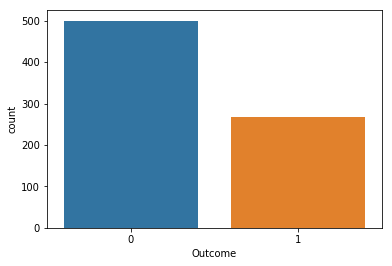

In [34]:
sns.countplot(diabetes["Outcome"], label = "Count")

In [35]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [92]:
x_train , x_test, y_train, y_test = train_test_split(
    diabetes.loc[:, diabetes.columns != "Outcome"], 
    diabetes["Outcome"],
    stratify = diabetes["Outcome"],
    random_state = 66
)

In [93]:
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1, 11)
print(neighbors_setting)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [94]:
for neighbor in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(x_train, y_train)
    
    train_acc = knn.score(x_train, y_train)
    training_accuracy.append(train_acc)
    
    test_acc = knn.score(x_test, y_test)
    test_accuracy.append(test_acc)

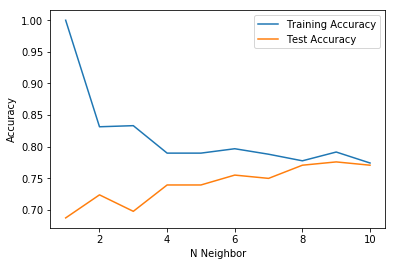

In [95]:
# len(test_accuracy)
plt.plot(neighbors_setting, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_setting, test_accuracy, label = "Test Accuracy")
plt.xlabel("N Neighbor")
plt.ylabel("Accuracy")
plt.legend()

In [86]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
print("Accuracy On Training Data : {0}".format(knn.score(x_train, y_train)))
print("Accuracy On Test Data : {0}".format(knn.score(x_test, y_test)))

Accuracy On Training Data : 0.791666666667
Accuracy On Test Data : 0.776041666667


In [184]:
training_accuracy = []
test_accuracy = []

c_setting = np.arange(0.1, 5.0, 0.1)

reg_coff = np.array([])
c_reg = np.array([])

In [185]:
for c_val in c_setting:
    log_reg = LogisticRegression(C = c_val).fit(x_train, y_train)
    
    training_accuracy.append(log_reg.score(x_train, y_train))
    test_accuracy.append(log_reg.score(x_test, y_test))
    
    reg_coff = np.append(reg_coff, log_reg.coef_.T)
    c_reg = np.append(c_reg, [[c_val] * len(log_reg.coef_.T)])
    
print(reg_coff.shape)
print(c_reg.shape)

(392,)
(392,)


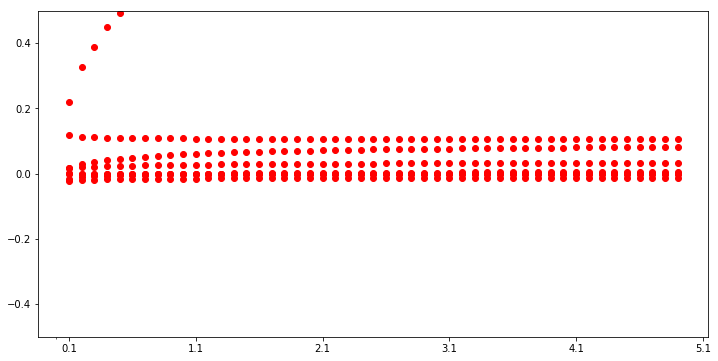

In [264]:
plt.figure(figsize=(12, 6))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(11))

plt.plot(c_reg, reg_coff, "ro")
plt.ylim(-0.5, 0.5)
plt.xticks(np.arange(min(c_reg), max(c_reg) + 1, 1.0))
plt.show()

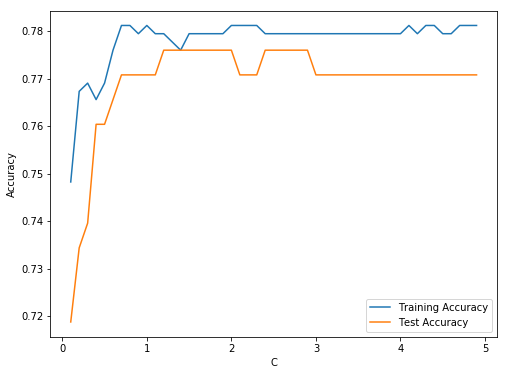

In [260]:
plt.figure(figsize=(8,6))
plt.plot(c_setting, training_accuracy, label = "Training Accuracy")
plt.plot(c_setting, test_accuracy, label = "Test Accuracy")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()

In [200]:
log_reg_C_0001 = LogisticRegression(C = 0.001).fit(x_train, y_train)
print("Accuracy On Training Data : {0}".format(log_reg_C_0001.score(x_train, y_train)))
print("Accuracy On Test Data : {0}".format(log_reg_C_0001.score(x_test, y_test)))
print(log_reg_C_0001.coef_.T)

log_reg_C_1 = LogisticRegression(C = 1).fit(x_train, y_train)
print("Accuracy On Training Data : {0}".format(log_reg_C_1.score(x_train, y_train)))
print("Accuracy On Test Data : {0}".format(log_reg_C_1.score(x_test, y_test)))
print(log_reg_C_1.coef_.T)

log_reg_C_100 = LogisticRegression(C = 100).fit(x_train, y_train)
print("Accuracy On Training Data : {0}".format(log_reg_C_100.score(x_train, y_train)))
print("Accuracy On Test Data : {0}".format(log_reg_C_100.score(x_test, y_test)))
print(log_reg_C_100.coef_.T)

Accuracy On Training Data : 0.685763888889
Accuracy On Test Data : 0.713541666667
[[ 0.0621956 ]
 [ 0.0114425 ]
 [-0.02532259]
 [-0.00252467]
 [ 0.00115815]
 [ 0.00085406]
 [ 0.00329598]
 [-0.01160978]]
Accuracy On Training Data : 0.78125
Accuracy On Test Data : 0.770833333333
[[  1.08036613e-01]
 [  2.74327800e-02]
 [ -1.49806403e-02]
 [ -1.36737211e-03]
 [ -3.50136849e-04]
 [  5.91861497e-02]
 [  6.17545218e-01]
 [ -9.69377626e-04]]
Accuracy On Training Data : 0.784722222222
Accuracy On Test Data : 0.765625
[[ 0.10821676]
 [ 0.03580881]
 [-0.01131212]
 [-0.00136427]
 [-0.00102962]
 [ 0.09311513]
 [ 0.91140371]
 [ 0.00743867]]


In [201]:
diabetes_features = [x for i, x in enumerate(diabetes.columns)]
diabetes_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

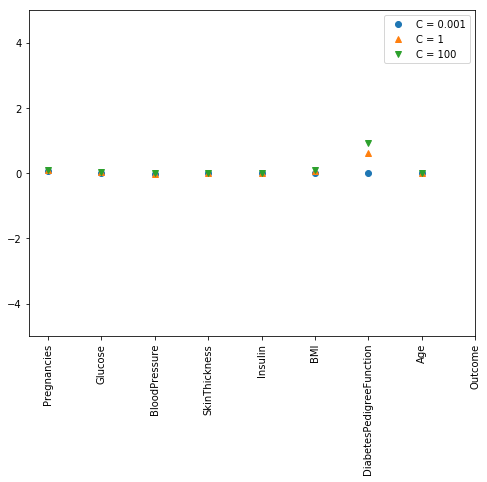

In [259]:
plt.figure(figsize=(8,6))
plt.plot(log_reg_C_0001.coef_.T, "o", label = "C = 0.001")
plt.plot(log_reg_C_1.coef_.T, "^", label = "C = 1")
plt.plot(log_reg_C_100.coef_.T, "v", label = "C = 100")
plt.ylim(-5, 5)
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation = 90)
plt.legend()

In [237]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [204]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(x_train, y_train)
print("Accuracy On Training Set : {0}".format(tree.score(x_train, y_train)))
print("Accuracy On Data Set : {0}".format(tree.score(x_test, y_test)))

Accuracy On Training Set : 1.0
Accuracy On Data Set : 0.713541666667


In [207]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree.fit(x_train, y_train)
print("Accuracy On Training Set : {0}".format(tree.score(x_train, y_train)))
print("Accuracy On Data Set : {0}".format(tree.score(x_test, y_test)))

Accuracy On Training Set : 0.772569444444
Accuracy On Data Set : 0.739583333333


In [222]:
print("Tree Features : {0}".format(tree.feature_importances_))

Tree Features : [ 0.04554275  0.6830362   0.          0.          0.          0.27142106
  0.          0.        ]


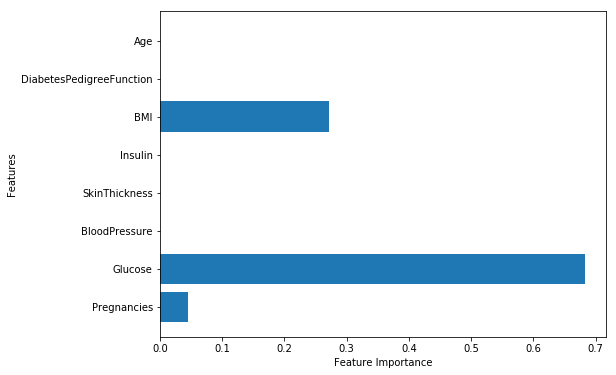

In [258]:
plt.figure(figsize=(8,6))
plt.barh(range(len(tree.feature_importances_)), tree.feature_importances_, align = "center")
plt.yticks(range(len(tree.feature_importances_)), diabetes_features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

In [249]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)
print("Accuracy On Training Set : {0}".format(rf.score(x_train, y_train)))
print("Accuracy On Data Set : {0}".format(rf.score(x_test, y_test)))

Accuracy On Training Set : 1.0
Accuracy On Data Set : 0.786458333333


In [250]:
rf = RandomForestClassifier(max_depth = 2, n_estimators = 100, random_state = 0)
rf.fit(x_train, y_train)
print("Accuracy On Training Set : {0}".format(rf.score(x_train, y_train)))
print("Accuracy On Data Set : {0}".format(rf.score(x_test, y_test)))

Accuracy On Training Set : 0.763888888889
Accuracy On Data Set : 0.75


In [251]:
print("Random Forest Important Features : {0}".format(rf.feature_importances_))

Random Forest Important Features : [ 0.0595868   0.30786128  0.04138421  0.04165502  0.10596851  0.20186898
  0.09518828  0.14648691]


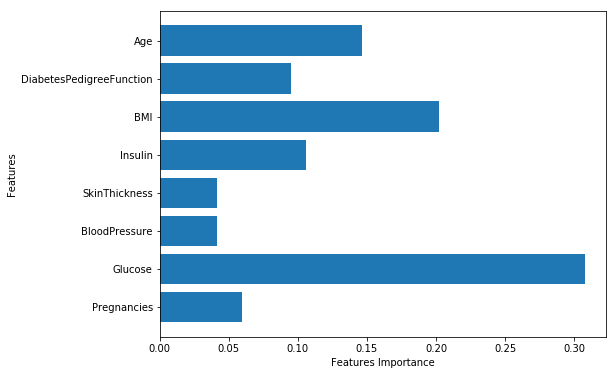

In [257]:
plt.figure(figsize=(8,6))
plt.barh(range(8), rf.feature_importances_, align = "center")
plt.yticks(range(len(rf.feature_importances_)), diabetes_features)
plt.xlabel("Features Importance")
plt.ylabel("Features")
# plt.ylim(-1, len(diabetes_features))
plt.show()
# plot_feature_importances_diabetes(rf)

In [285]:
gb = GradientBoostingClassifier(random_state = 0)
gb.fit(x_train, y_train)
print("Accuracy On Training Set : {0}".format(gb.score(x_train, y_train)))
print("Accuracy On Data Set : {0}".format(gb.score(x_test, y_test)))

Accuracy On Training Set : 0.916666666667
Accuracy On Data Set : 0.791666666667


Text(0,0.5,u'Features')

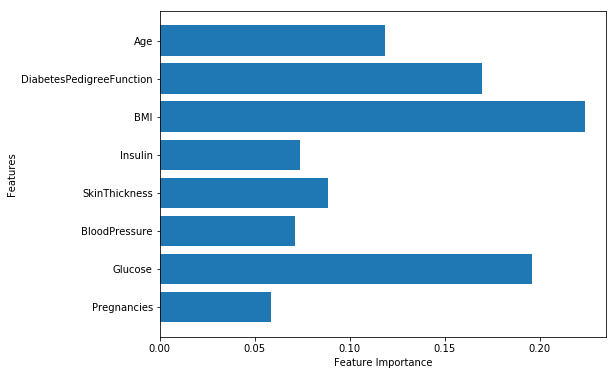

In [286]:
plt.figure(figsize=(8,6))
plt.barh(range(len(gb.feature_importances_)), gb.feature_importances_)
plt.yticks(range(len(gb.feature_importances_)), diabetes_features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")

In [287]:
gb = GradientBoostingClassifier(max_depth = 1, random_state = 0, learning_rate = 0.01)
gb.fit(x_train, y_train)
print("Accuracy On Training Set : {0}".format(gb.score(x_train, y_train)))
print("Accuracy On Data Set : {0}".format(gb.score(x_test, y_test)))

Accuracy On Training Set : 0.744791666667
Accuracy On Data Set : 0.734375


Text(0,0.5,u'Features')

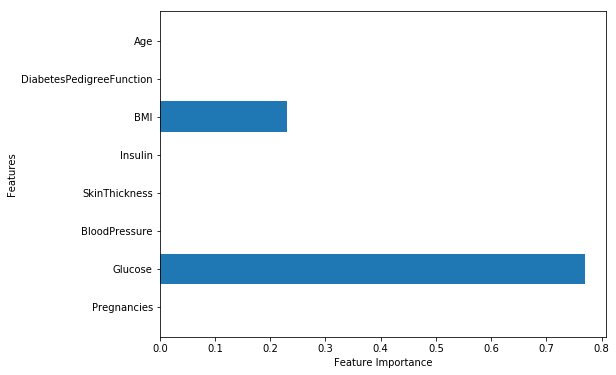

In [288]:
plt.figure(figsize=(8,6))
plt.barh(range(len(gb.feature_importances_)), gb.feature_importances_)
plt.yticks(range(len(gb.feature_importances_)), diabetes_features)
plt.yticks()
plt.xlabel("Feature Importance")
plt.ylabel("Features")

In [297]:
svc = SVC()
svc.fit(x_train, y_train)
print("Accuracy On Training Set : {0}".format(svc.score(x_train, y_train)))
print("Accuracy On Data Set : {0}".format(svc.score(x_test, y_test)))

Accuracy On Training Set : 1.0
Accuracy On Data Set : 0.651041666667


In [304]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [305]:
svc = SVC()
svc.fit(x_train_scaled, y_train)
print("Accuracy On Training Set : {0}".format(svc.score(x_train_scaled, y_train)))
print("Accuracy On Data Set : {0}".format(svc.score(x_test_scaled, y_test)))

Accuracy On Training Set : 0.769097222222
Accuracy On Data Set : 0.770833333333


In [308]:
svc = SVC(C = 1000)
svc.fit(x_train_scaled, y_train)
print("Accuracy On Training Set : {0}".format(svc.score(x_train_scaled, y_train)))
print("Accuracy On Data Set : {0}".format(svc.score(x_test_scaled, y_test)))

Accuracy On Training Set : 0.789930555556
Accuracy On Data Set : 0.796875


In [315]:
mlp = MLPClassifier(random_state = 42)
mlp.fit(x_train, y_train)
print("Accuracy On Training Set : {0}".format(mlp.score(x_train, y_train)))
print("Accuracy On Data Set : {0}".format(mlp.score(x_test, y_test)))

Accuracy On Training Set : 0.710069444444
Accuracy On Data Set : 0.671875


In [319]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [323]:
mlp = MLPClassifier(random_state = 0)
mlp.fit(x_train_scaled, y_train)
print("Accuracy On Training Set : {0}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy On Data Set : {0}".format(mlp.score(x_test_scaled, y_test)))

Accuracy On Training Set : 0.822916666667
Accuracy On Data Set : 0.802083333333


In [324]:
mlp = MLPClassifier(max_iter = 1000, random_state = 0)
mlp.fit(x_train_scaled, y_train)
print("Accuracy On Training Set : {0}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy On Data Set : {0}".format(mlp.score(x_test_scaled, y_test)))

Accuracy On Training Set : 0.876736111111
Accuracy On Data Set : 0.755208333333


In [326]:
mlp = MLPClassifier(max_iter = 1000, alpha = 1 ,random_state = 0)
mlp.fit(x_train_scaled, y_train)
print("Accuracy On Training Set : {0}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy On Data Set : {0}".format(mlp.score(x_test_scaled, y_test)))

Accuracy On Training Set : 0.795138888889
Accuracy On Data Set : 0.791666666667


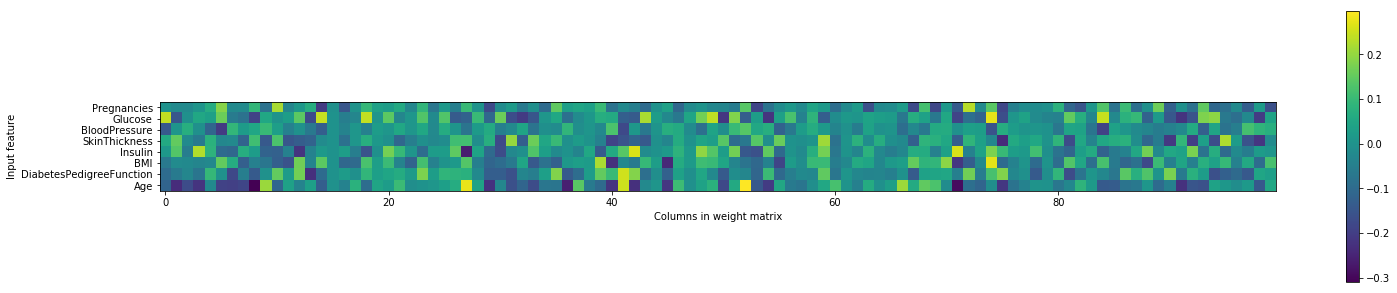

In [343]:
plt.figure(figsize=(25, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [340]:
len(mlp.coefs_)

2

In [338]:
mlp.coefs_[0].shape

(8, 100)

In [339]:
mlp.coefs_[1].shape

(100, 1)